<a href="https://colab.research.google.com/github/nooYeaT/project/blob/main/Adidas_%EB%AF%B8%EA%B5%AD_%ED%8C%90%EB%A7%A4%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차 프로젝트: Adidas 미국 판매데이터 분석-파트1



데이터 출처 : Kaggle
 (https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)



# (1) 데이터 로드 및 확인






In [ ]:
import pandas as pd
import numpy as np

adidas = pd.read_csv('Adidas US Sales Datasets.csv')

In [ ]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store


In [ ]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

Retailer : adidas 브랜드를 판매하는 유통처

Retailer ID : 판매점 ID

Price per Unit : 상품 1개당 가격

Units Sold : 판매수량

Total Sales : 판매금액

Operating Profit : 영업이익(매출액 - 원가)

Operating Margin : 영업마진(영업이익율)

In [ ]:
adidas.info() # 데이터타입 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


# (2) 데이터 전처리

데이터타입 변환

 Retailer          object

 Retailer ID       int64  -> 문자

 Invoice Date      object -> 날짜

 Region            object

 State             object

 City              object

 Product           object

 Price per Unit    object -> 숫자(실수, float)

 Units Sold        object -> 숫자(실수, float)

 Total Sales       object -> 숫자(실수, float)

 Operating Profit  object -> 숫자(실수, float)

 Operating Margin  object -> 숫자(실수, float)

 Sales Method      object

## 1) 숫자가 문자로 나타난 경우 문자를 숫자로 변환

### Pandas 데이터프레임내 문자 변환

* DataFrame['컬럼명'].str.메소드 형태로 문자열 함수 사용
* 현재 가격, 매출액 등의 컬럼에는 모두 특수문자 '%', '$', ',' 가 포함되어있음

정규표현식을 사용하여 특수문자 전체를 제거하는 법
* adidas['Price per Unit'].str.replace('[\\W]', '', regex=True)
* [\\W] : 숫자, 문자를 제외한 나머지(특수문자)를 의미


하지만, 이 경우 소수점이 있기 때문에 특수문자 전체를 제거하면 안됨
* adidas['Price per Unit'].str.replace(['%$,'], '')
* 대괄호 [ ]  안에 있는 문자들을 공백으로 대체

In [ ]:
adidas['Price per Unit']=adidas['Price per Unit'].str.replace('[%$,]', '', regex=True).astype('float')
adidas['Units Sold']=adidas['Units Sold'].str.replace('[$%,]', '', regex=True).astype('float')
adidas['Total Sales']=adidas['Total Sales'].str.replace('[$%,]', '', regex=True).astype('float')
adidas['Operating Profit']=adidas['Operating Profit'].str.replace('[$%,]', '', regex=True).astype('float')
adidas['Operating Margin']=adidas['Operating Margin'].str.replace('[$%,]', '', regex=True).astype('float')

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store


Operating Margin은 백분율이기 때문에 0.01을 곱하여 계산에 사용할 수 있도록 새로운 변수 생성

In [ ]:
adidas['Operating Margin']=adidas['Operating Margin']*0.01
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


## 2) Pandas 시간데이터 다루기

YYYY-mm-dd 형태의 문자 데이터를 pandas의 datetime으로 변환

'%Y-%m-%d'

만약 19990101와 같은 형태라면

'%Y%m%d'


In [ ]:
adidas.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.5,In-store


In [ ]:
adidas['Invoice Date']=pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d')

In [ ]:
adidas['year']=adidas['Invoice Date'].dt.year
adidas['month']=adidas['Invoice Date'].dt.month

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


## 3) 문자를 숫자로 변환

In [ ]:
adidas['Retailer ID']=adidas['Retailer ID'].astype('int')

## 4) 결측치 처리

In [ ]:
adidas.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

# (3) 데이터분석-1

## 월별 판매량 분석

In [ ]:
adidas.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,0.422991,2020.865050,6.458126
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,0.350000,2021.000000,3.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,0.410000,2021.000000,6.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,0.490000,2021.000000,9.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.124141,0.097197,0.341688,3.454799


월별 판매량 그래프


<Axes: xlabel='year,month'>

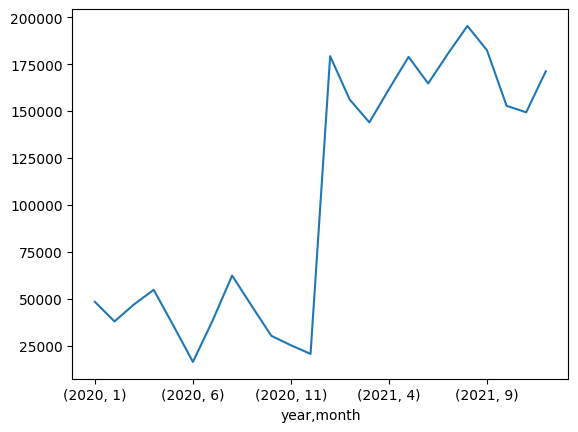

In [ ]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

2021년 1월부터 판매량이 급등

In [ ]:
adidas.groupby(['year', 'month'])['Units Sold'].sum()

year  month
2020  1         48333.0
      2         37846.0
      3         46972.0
      4         54709.0
      5         35705.0
      6         16269.0
      7         38219.0
      8         62307.0
      9         46125.0
      10        30167.0
      11        25152.0
      12        20545.0
2021  1        179299.0
      2        156113.0
      3        143988.0
      4        161717.0
      5        178900.0
      6        164745.0
      7        180481.0
      8        195414.0
      9        182425.0
      10       152834.0
      11       149350.0
      12       171246.0
Name: Units Sold, dtype: float64

In [ ]:
adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum') # 연도별 비교 편하게

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


소매업체별 분석

In [ ]:
# 특정업체의 판매량이 급증했는지 확인
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

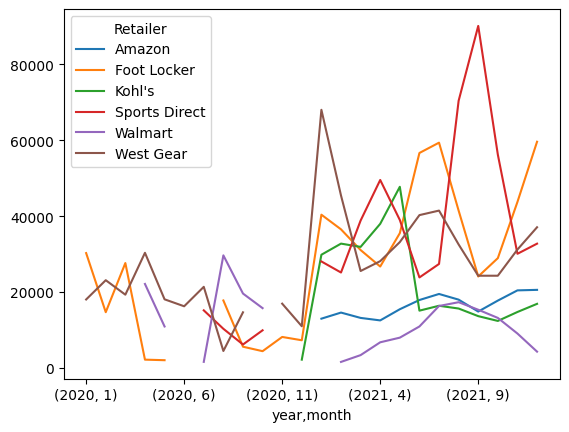

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()
# 전체적인 판매량 증가했다, 판매하지 않았던 Amazon, Kohl's의 판매 시작이거나 판매가 0이거나 그런데 판매 시작이 더 가능성 있음

In [ ]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer') # 중복을 제거하고 Retailer 이름 순서로 정렬
# 소매브랜드 안에도 10개 여러개 있음(해당 소매점 브랜드의 점포 ID로 보인다)

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


매장이 늘었는지 의문

월별로 상점의 숫자는 어떻게 될까?


예) 2020년에는 Foot Locker의 상점 수가 1개였는데 2021년에는 3개로 늘지 않앗을까?


In [ ]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])
df

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


여기부터

In [ ]:
df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count') # 소매별 개수

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

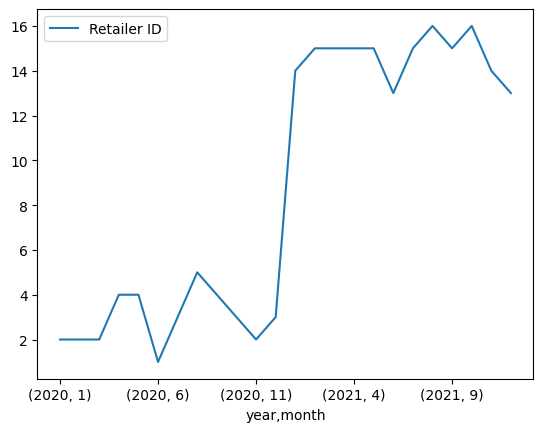

In [ ]:
df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count').plot(kind='line')

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count') # columns만 추가

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

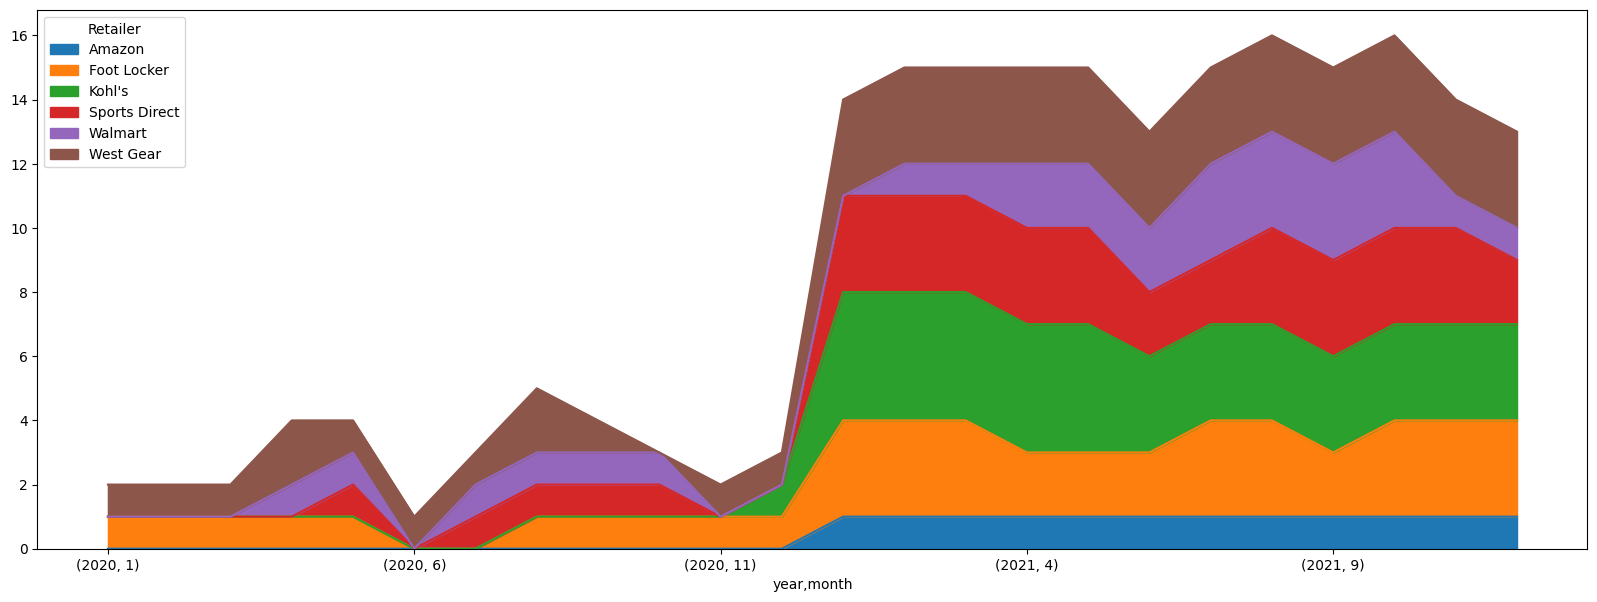

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', figsize=(20,7))

아디다스는 2020년 코로나로 인해 매출액이 하락했다가 2021년에 회복세였음

https://www.statista.com/statistics/268416/net-sales-of-the-adidas-group-worldwide-since-2000/

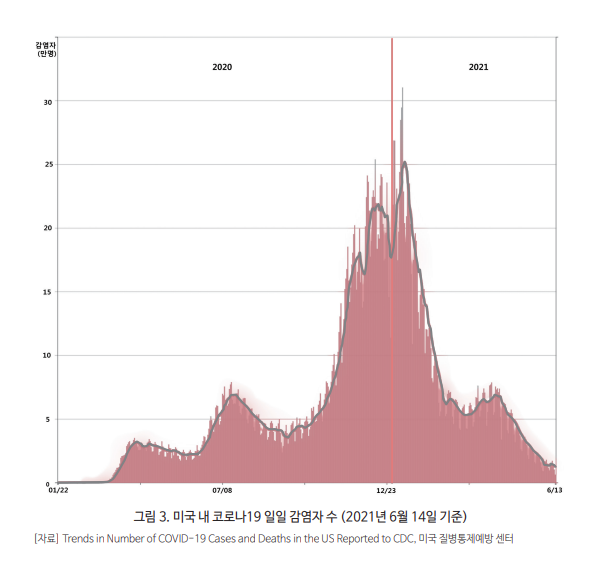

출처 : 보건산업브리프 Vol.329(보건산업진흥원)

<br><br><br><br>



---


<br><br><br><br>

<br><br><br><br>

# 2차 프로젝트 : Adidas 미국 판매데이터 분석-파트2

# (4) 데이터분석-2

## 마진율 분석

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [ ]:
adidas.groupby('year').agg({'Operating Margin':'mean'})

,Operating Margin
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

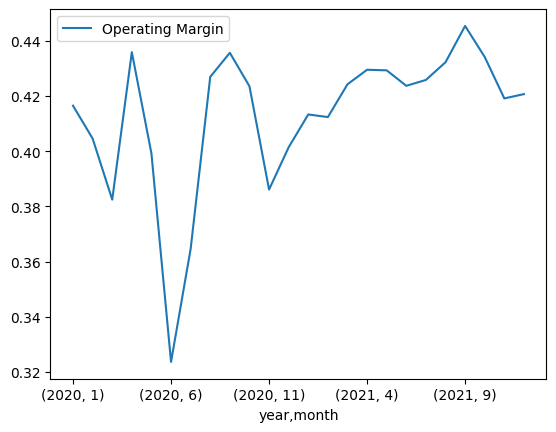

In [ ]:
adidas.pivot_table(index=['year', 'month'], values='Operating Margin', aggfunc='mean').plot(kind='line')

<Axes: xlabel='year,month'>

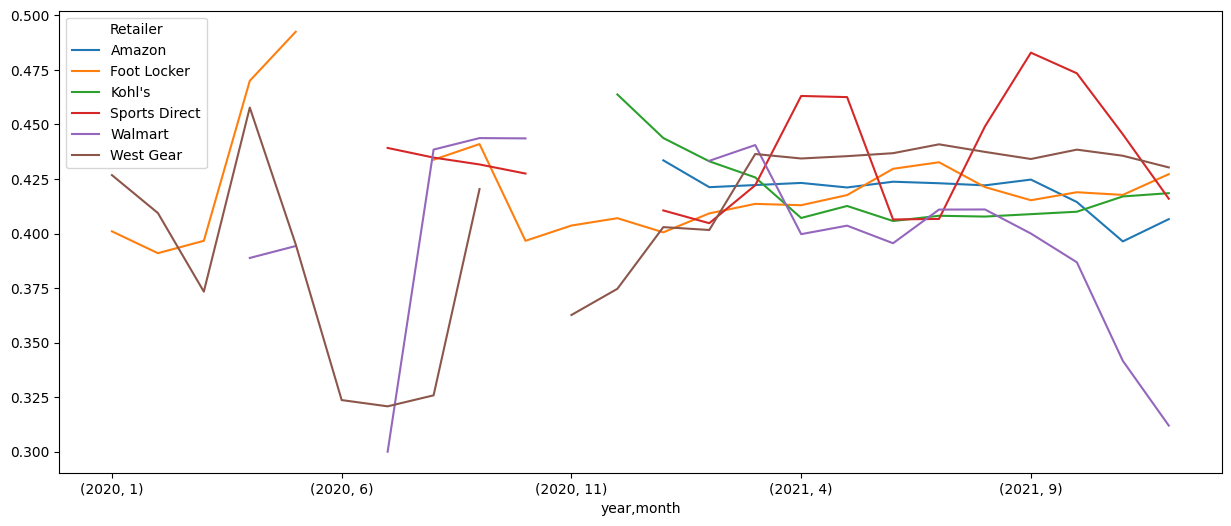

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Operating Margin', aggfunc='mean').plot(kind='line', figsize=(15,6))

## 판매방법에 따른 마진율/판매단가

<Axes: xlabel='year,month'>

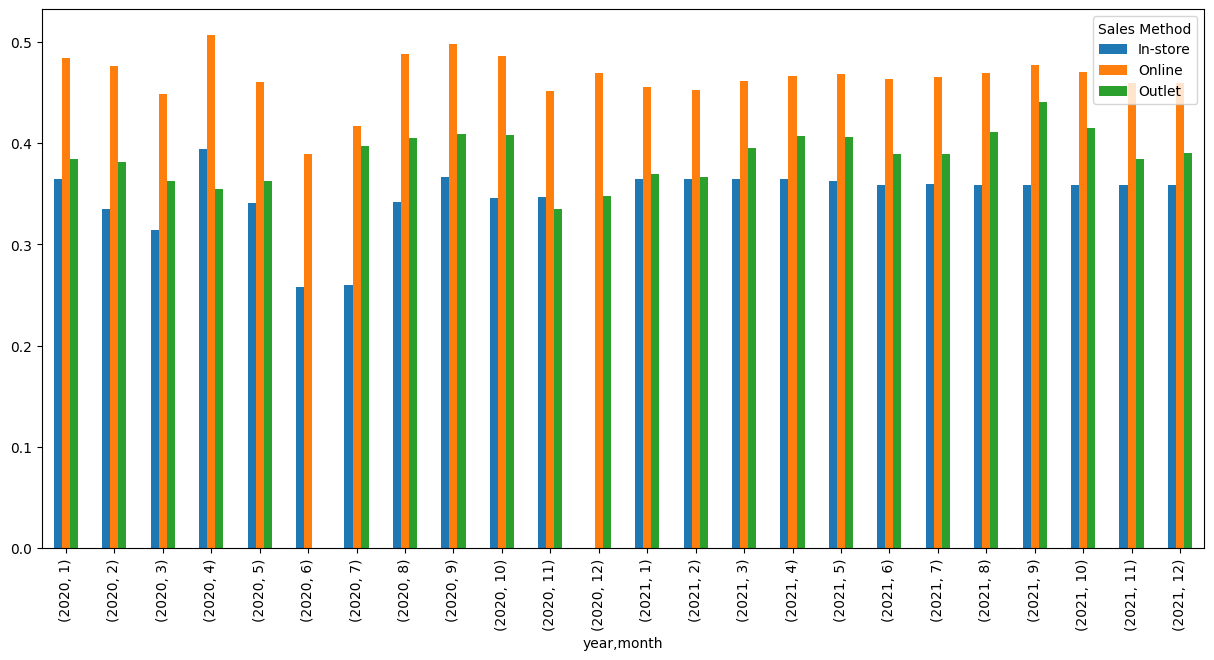

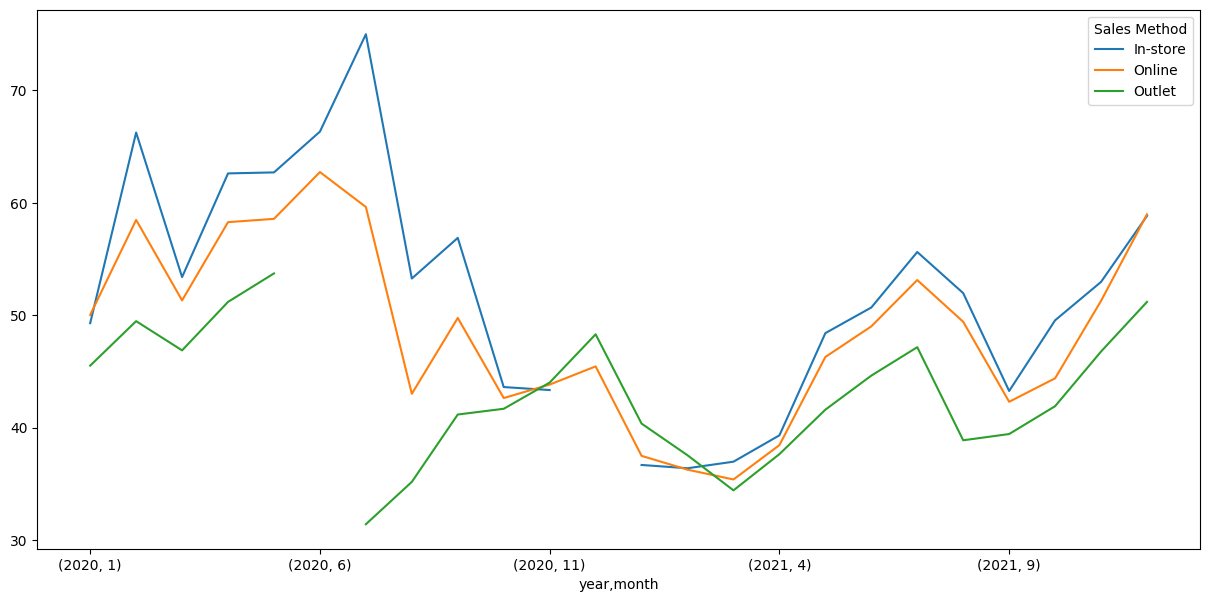

## 판매방법에 따라 판매성과에 차이가 있을까?(분석 분석)


일원배치 분산분석(ANOVA)을 이용한 통계적 검증 -> 여러 집단(2개보다 큰)

세개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법

최소자승법(OLS)를 이용하여 검증할 수 있음

BoxPlot을 이용한 시각화

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

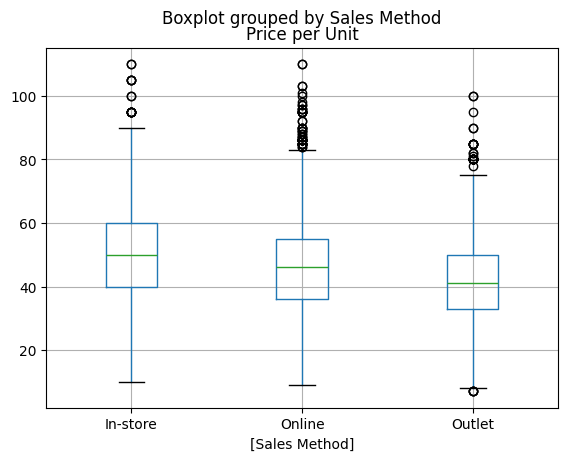

In [ ]:
adidas[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method') # Sales Method 그룹

<Axes: title={'center': 'Operating Margin'}, xlabel='[Sales Method]'>

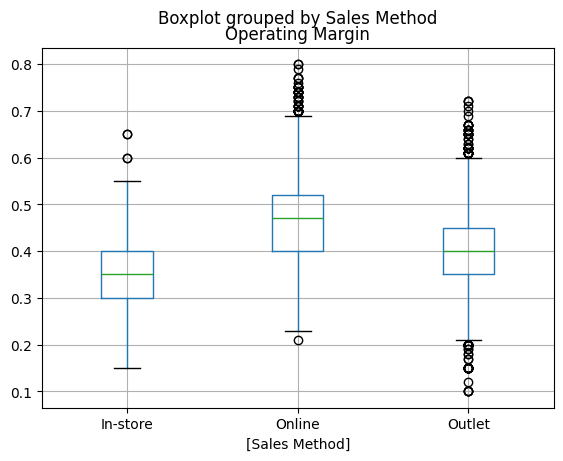

In [ ]:
adidas[['Sales Method', 'Operating Margin']].boxplot(by='Sales Method') # Sales Method 그룹

ANOVA 함수

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
# x : 비교그룹(매장, 온라인, 아울렛) -> Sales Method
# y : 비교할 변수 -> 영업이익, 단가
x='Sales Method'
y='Operating Margin'

In [ ]:
df=adidas[[x,y]]
df

,Sales Method,Operating Margin
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


In [ ]:
# 띄어쓰기 있는 경우 statsmodels의 ols 함수가 인식 못함
# 띄어쓰기를 _로 바꿈
x=x.replace(' ','_')
y=y.replace(' ','_')
print('바뀐 이름: '+x,',',y)

바뀐 이름: Sales_Method , Operating_Margin


In [ ]:
df.columns=[x,y]

In [ ]:
df.columns

Index(['Sales_Method', 'Operating_Margin'], dtype='object')

In [ ]:
# the "C" indicates categorical data
model=ols(f'{y}  ~ C({x})', df).fit()

In [ ]:
anova_table=anova_lm(model)
print(anova_table)

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [ ]:
if anova_table.iloc[0,4]<0.05:
  print('판매 방법에 따른 {}가 차이가 있다'.format(y))
else:
  print('판매 방법에 따른 {}가 차이가 없다'.format(y))

판매 방법에 따른 Operating_Margin가 차이가 있다


In [ ]:
def anova_analysis(x,y):
  df=adidas[[x,y]]

  x=x.replace(' ','_')
  y=y.replace(' ','_')
  print('바뀐 이름:', x, ',',y)

  df.columns=[x,y]

  model=ols(f'{y} ~ C({x})', df).fit()

  anova_table=anova_lm(model)
  print(anova_table)

  if anova_table.iloc[0,4]<0.05:
    print('판매 방법에 따른 {}가 차이가 있다'.format(y))
  else:
    print('판매 방법에 따른 {}가 차이가 없다'.format(y))

In [ ]:
print('판매가격의 차이 검증')
anova_analysis('Sales Method', 'Price per Unit')
print('\r\n\r\n')
print("======================================================")
print('\r\n\r\n')
print('마진율의 차이 검증')
anova_analysis('Sales Method', 'Operating Margin')

판매가격의 차이 검증
바뀐 이름: Sales_Method , Price_per_Unit
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
판매 방법에 따른 Price_per_Unit가 차이가 있다






마진율의 차이 검증
바뀐 이름: Sales_Method , Operating_Margin
                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
판매 방법에 따른 Operating_Margin가 차이가 있다


=> 판매방법에 따라 단가 차이가 있다.
In-Store > On-line > Outlet 순
<br>
<br>

=> 즉, 매장 방법 손님의 객단가가 가장 높고, 다음으로 온라인, 아웃렛 순으로 높음
=> 할인율이 높다는 의미는 아님
<br>
<br>
=> 아울렛은 매장, 온라인에서 판매되지 않는 상품이 판매되기 때문에 인사이트 분석을 위한 비교대상으로 보기 어려움
<br>
<br>
=> 판매방법에 따라 마진율(이익율) 차이가 있다.
On-line > Outlet > In-Store 순
<br><br>
<br>
분석 결과
<br>
=> 온라인 : 단가 낮은 상품이 많이 팔리고, 마진율(이익율)은 높음
<br>
=> 매장 : 단가 높은 상품 많이 팔리고, 마진율(이익율)도 낮음

<br>
온/오프라인 판매전략 수립에 활용